# <center>   Model Devloppement
   

<img src="Downloads\car-price-prediction_Model-selection.png">

### In this part of our project we will,predict the price of house using multiple machine learning models, then evaluate each model and select the best. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

import sklearn 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures


from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,\
VotingRegressor,ExtraTreesRegressor,HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import svm


from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_error as mae
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix


from datetime import datetime

warnings.filterwarnings("ignore")

## 1-Data Preparation

In [4]:
pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",1000)
train_df=pd.read_csv("cars_price_prediction_22_features.csv")
train_df.drop(columns=["Unnamed: 0"],inplace=True)

In [5]:
data=pd.read_csv("House_price_prediction_No_Outliers.csv")
test_df=data[data["SalePrice"].isnull()]

test_df['Age']=datetime.now().year-test_df["YearBuilt"]

test_df[['GrLivArea_m2']]=test_df[['GrLivArea']]*0.092903
test_df[["GarageArea_m2"]]=test_df[["GarageArea"]]*0.092903
test_df[["TotalBsmt_m2"]]=test_df[["TotalBsmtSF"]]*0.092903
test_df[["1stFlr_m2"]]=test_df[["1stFlrSF"]]*0.092903

In [6]:
test_df=test_df[train_df.columns]
test_df.drop(columns=["SalePrice"],inplace=True)

In [7]:
df=pd.concat([train_df,test_df])


## Linear Regression 

In [8]:
# define predictor(X) and target(Y)
#train_df=pd.get_dummies(train_df)
X=train_df.drop(columns="SalePrice")
X=X.select_dtypes(include=["int","float"])

Y=train_df["SalePrice"]


In [9]:
# Normalize the data
#scaler=StandardScaler()
#X=scaler.fit_transform(X)

In [10]:
# define train and test data 
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=123)
print(x_train.shape,
      y_train.shape,
      x_test.shape,
      y_test.shape)

(922, 10) (922,) (396, 10) (396,)


In [11]:
model_=[]
score=[]
RMSE=[]
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(x_train,y_train)
    print("Training score: {}".format(model.score(x_train,y_train)))
    predictions = model.predict(x_test)
    print("Predictions are: {}".format(predictions[0:5]))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mse(y_test,predictions)))
    print('MSE:{}'.format(mse(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mse(y_test,predictions))))
    model_.append(type(ml_model).__name__)
    score.append(np.round(r2score,3))
    RMSE.append(np.sqrt(mse(y_test,predictions)))
    
     
    sns.distplot(y_test-predictions)      
          

Model is: LinearRegression()
Training score: 0.8309640560021117
Predictions are: [121047.54384872  85847.03853661 248041.5985122  211695.51685356
  34557.7706586 ]


r2 score is: 0.8412501993053197
MAE:804665166.5776389
MSE:804665166.5776389
RMSE:28366.62064077494
None
Model is: Lasso()
Training score: 0.8309640509102265
Predictions are: [121045.2727226   85847.04406276 248044.13954455 211696.43782979
  34563.67723647]


r2 score is: 0.8412489323008612
MAE:804671588.7233628
MSE:804671588.7233628
RMSE:28366.73383954104
None
Model is: Ridge()
Training score: 0.8309635271434479
Predictions are: [121037.68127594  85857.74132962 248061.38924882 211715.42284424
  34614.04208623]


r2 score is: 0.8412135752574436
MAE:804850805.2080879
MSE:804850805.2080879
RMSE:28369.892583654382
None


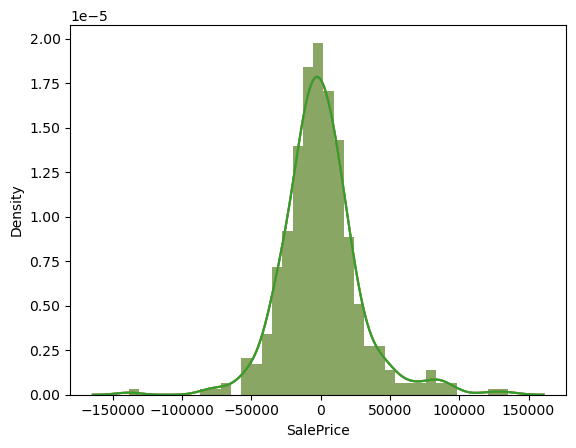

In [12]:
print(predict(LinearRegression()))
print(predict(Lasso()))
print(predict(Ridge()))

Model is: DecisionTreeRegressor()
Training score: 0.9998721716333128
Predictions are: [132000. 132000. 260400. 202665.  68500.]


r2 score is: 0.705210963566618
MAE:1494215854.564394
MSE:1494215854.564394
RMSE:38655.088339886046


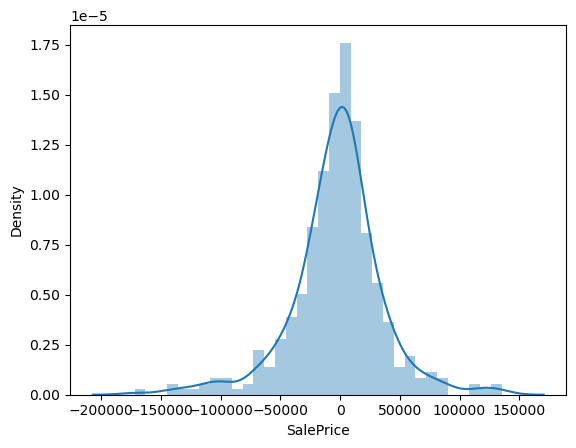

In [13]:
predict(DecisionTreeRegressor())

Model is: RandomForestRegressor()
Training score: 0.9778406437577113
Predictions are: [120105.5        114987.5        243096.57       198299.98666667
  77400.        ]


r2 score is: 0.8484504411741138
MAE:768168844.7088916
MSE:768168844.7088916
RMSE:27715.85908300321


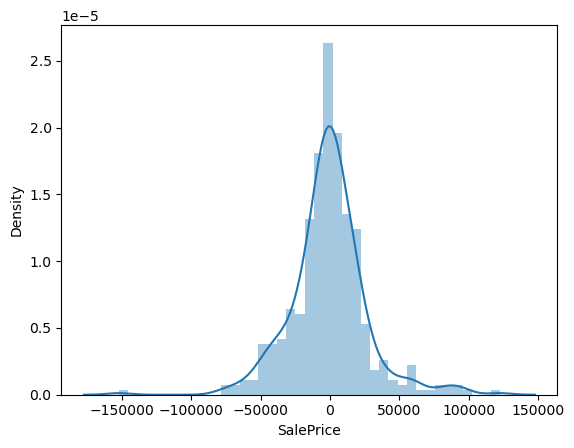

In [14]:
predict(RandomForestRegressor())

In [36]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922 entries, 1247 to 1122
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    922 non-null    int64  
 1   GarageCars     922 non-null    float64
 2   FullBath       922 non-null    int64  
 3   TotRmsAbvGrd   922 non-null    int64  
 4   YearRemodAdd   922 non-null    int64  
 5   BsmtQual       922 non-null    object 
 6   BsmtCond       922 non-null    object 
 7   ExterQual      922 non-null    object 
 8   Foundation     922 non-null    object 
 9   GarageFinish   922 non-null    object 
 10  HeatingQC      922 non-null    object 
 11  KitchenQual    922 non-null    object 
 12  BsmtFinType1   922 non-null    object 
 13  Condition2     922 non-null    object 
 14  HouseStyle     922 non-null    object 
 15  Exterior1st    922 non-null    object 
 16  Age            922 non-null    int64  
 17  GrLivArea_m2   922 non-null    float64
 18  Garage

Model is: GradientBoostingRegressor()
Training score: 0.9327542140644142
Predictions are: [125456.21060857 112941.53675635 236707.97779895 197480.93437624
  64233.92700338]


r2 score is: 0.8645242991540478
MAE:686694262.9937015
MSE:686694262.9937015
RMSE:26204.851897953962


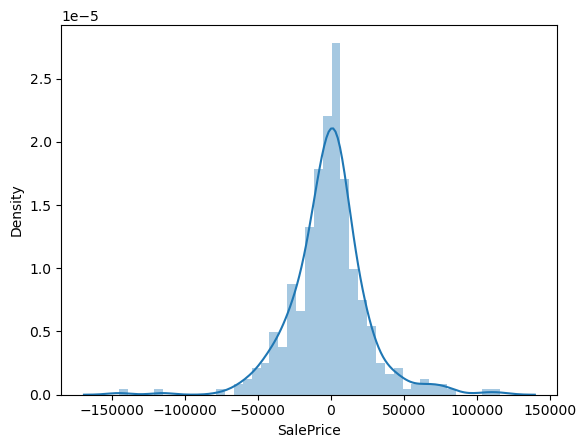

In [15]:
predict(GradientBoostingRegressor())

Model is: AdaBoostRegressor()
Training score: 0.8416759852441433
Predictions are: [115195.95212766 107621.54545455 253626.31967213 191269.41666667
 104316.72839506]


r2 score is: 0.7937723524225955
MAE:1045319135.2973306
MSE:1045319135.2973306
RMSE:32331.395504947362


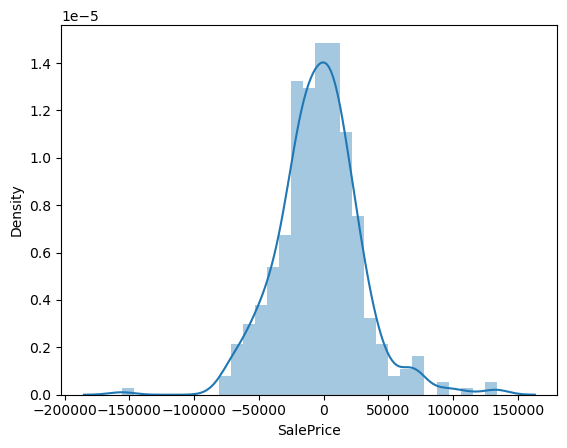

In [16]:
predict(AdaBoostRegressor())

Model is: ExtraTreesRegressor()
Training score: 0.9998721716333128
Predictions are: [125773.   118242.33 242866.51 202665.    79110.  ]


r2 score is: 0.8398033830333568
MAE:811998735.8255485
MSE:811998735.8255485
RMSE:28495.591515628315


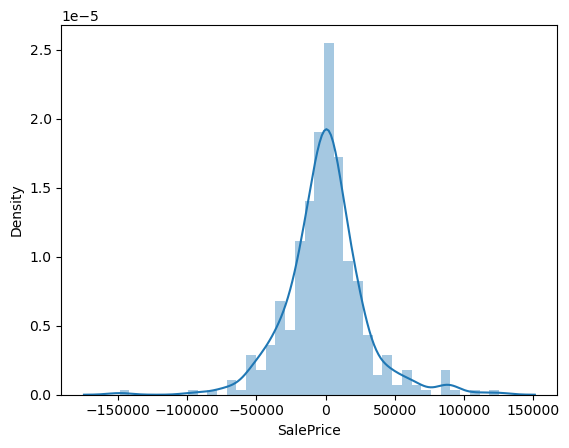

In [17]:
predict(ExtraTreesRegressor())

Model is: HistGradientBoostingRegressor()
Training score: 0.9696913587905092
Predictions are: [123183.55285948 111126.25925706 242225.74955777 203226.0593841
  66232.13707817]


r2 score is: 0.8486473099244513
MAE:767170963.6086259
MSE:767170963.6086259
RMSE:27697.85124533356


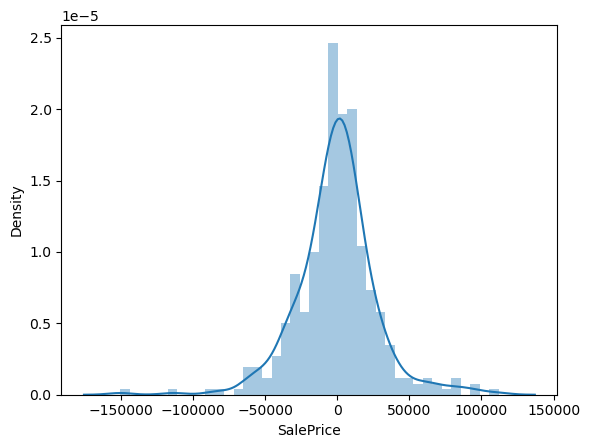

In [18]:
predict(HistGradientBoostingRegressor())

In [19]:
model_score=pd.DataFrame()
model_score["Model"]=model_
model_score["Score"]=score
Top5Scors=model_score.sort_values(by="Score",ascending=False).head(5)
print("The best 5 models are:")
Top5Scors

The best 5 models are:


,Model,Score
5,GradientBoostingRegressor,0.865
8,HistGradientBoostingRegressor,0.849
4,RandomForestRegressor,0.848
0,LinearRegression,0.841
1,Lasso,0.841


## Hypertuning Models

### GradientBoostingRegressor

In [20]:
GBR=GradientBoostingRegressor()

In [21]:
# Parameters:
para={"loss":['squared_error', 'absolute_error', 'huber', 'quantile'],
     "learning_rate":[0,0.2,0.5,0.8,1],
      #"n_estimators":[100,200,300,400]
     "criterion" : ['friedman_mse', 'squared_error'],
      "max_features" : ['auto', 'sqrt', 'log2']
     }

In [22]:
gs_3cv=GridSearchCV(GBR,param_grid=para,cv=3)

Model is: GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0, 0.2, 0.5, 0.8, 1],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2']})
Training score: 0.9390240888634486
Predictions are: [127811.15836428 113419.38106253 242658.72584246 189865.81794276
  55134.07271722]


r2 score is: 0.8687441116774313
MAE:665305032.0643016
MSE:665305032.0643016
RMSE:25793.50755644338


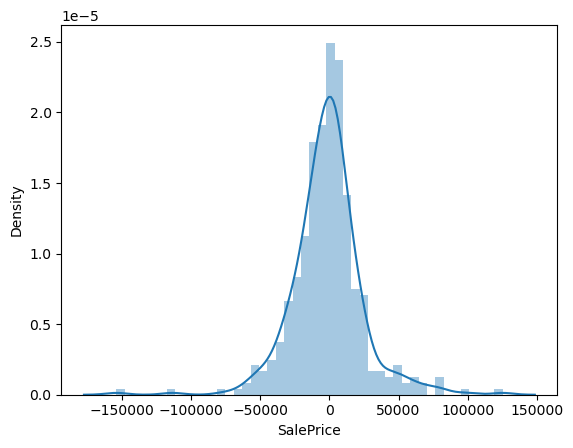

In [23]:
predict(gs_3cv)

In [24]:
gs_3cv.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.2,
 'loss': 'huber',
 'max_features': 'log2'}

In [25]:
gs_4cv=GridSearchCV(GBR,param_grid=para,cv=4)

Model is: GridSearchCV(cv=4, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0, 0.2, 0.5, 0.8, 1],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2']})
Training score: 0.9591791200905049
Predictions are: [124225.09456219 114071.99337904 240923.40868541 197099.40654483
  69067.35396974]


r2 score is: 0.8407109162868786
MAE:807398664.5597941
MSE:807398664.5597941
RMSE:28414.761384882226


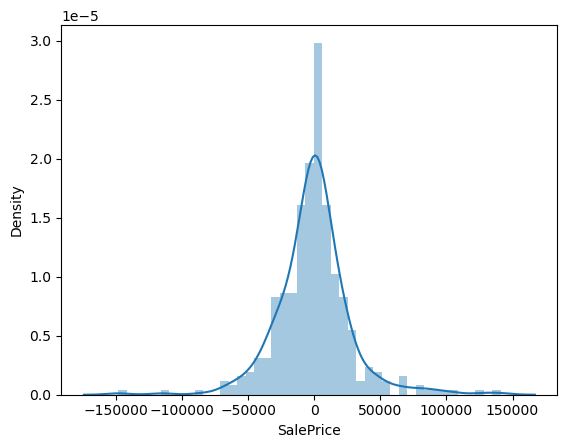

In [26]:
predict(gs_4cv)

In [27]:
gs_4cv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'loss': 'squared_error',
 'max_features': 'auto'}

## Linear Regression

In [28]:
lr=LinearRegression()
para={"n_jobs":[None,0,1,10,100],
     "positive":[True,False]}
gs_lr=GridSearchCV(lr,param_grid=para,cv=3)

Model is: GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'n_jobs': [None, 0, 1, 10, 100],
                         'positive': [True, False]})
Training score: 0.8309640560021117
Predictions are: [121047.54384872  85847.03853661 248041.5985122  211695.51685356
  34557.7706586 ]


r2 score is: 0.8412501993053197
MAE:804665166.5776389
MSE:804665166.5776389
RMSE:28366.62064077494


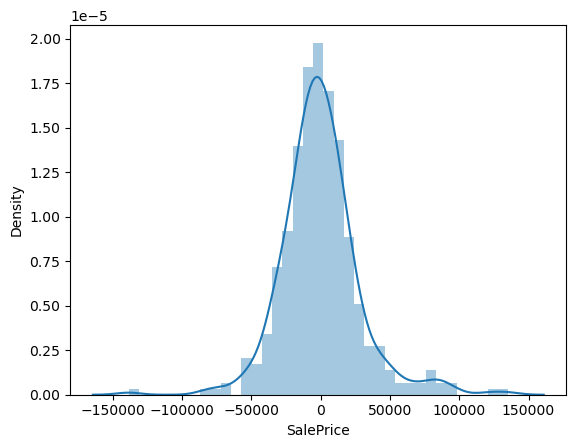

In [29]:
predict(gs_lr)

In [30]:
gs_lr.best_params_

{'n_jobs': None, 'positive': False}

## Ridge 

In [31]:
rr=Ridge()
param={"alpha":[10,1,0.1,0.001,0.0001],
      "solver":['auto', 'svd', 'cholesky','lsqr', 'sparse_cg','sag', 'saga', 'lbfgs'],
     "random_state":range(1,100,10),
      "tol":[0.001,0.0001,0.00001]}
sg_rr=GridSearchCV(rr,param_grid=param,cv=3)

Model is: GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [10, 1, 0.1, 0.001, 0.0001],
                         'random_state': range(1, 100, 10),
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs'],
                         'tol': [0.001, 0.0001, 1e-05]})
Training score: 0.8309029927768425
Predictions are: [120858.15559379  85772.29734771 248201.96473737 211969.90237135
  34967.17945228]


r2 score is: 0.8410099171402615
MAE:805883100.0019716
MSE:805883100.0019716
RMSE:28388.080245095327


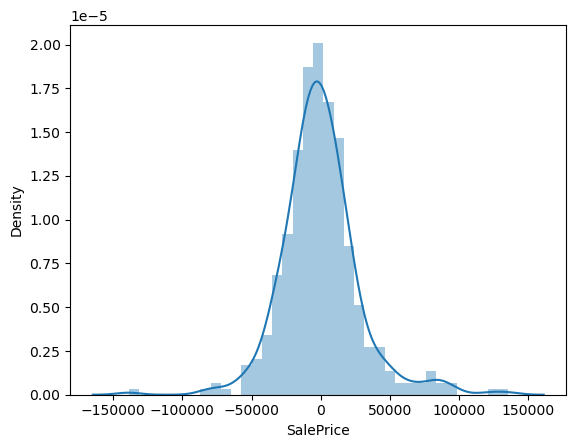

In [32]:
predict(sg_rr)

In [36]:
sg_rr.best_params_

{'alpha': 1, 'random_state': 71, 'solver': 'sag', 'tol': 0.0001}

## 	Hist Gradient Boosting Regressor	

In [37]:
hgbr=HistGradientBoostingRegressor()
param={"learning_rate":[0,0.2,0.5,0.8,1],
       "loss":['squared_error', 'absolute_error', 'poisson', 'quantile'],
      "l2_regularization":[0,0.1,0.5,1,5,10]}
sg_hgbr=GridSearchCV(hgbr,param_grid=param,cv=4)

Model is: GridSearchCV(cv=4, estimator=HistGradientBoostingRegressor(),
             param_grid={'l2_regularization': [0, 0.1, 0.5, 1, 5, 10],
                         'learning_rate': [0, 0.2, 0.5, 0.8, 1],
                         'loss': ['squared_error', 'absolute_error', 'poisson',
                                  'quantile']})
Training score: 0.9470468557619236
Predictions are: [129252.51929933 119181.60486257 219617.7121518  194352.51385698
  72631.72690488]


r2 score is: 0.8731617987309499
MAE:642912821.9748905
MSE:642912821.9748905
RMSE:25355.725625090883


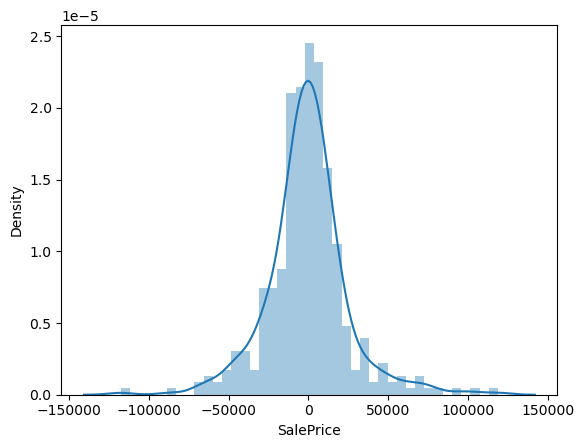

In [38]:
predict(sg_hgbr)

In [88]:
sg_hgbr.best_params_

{'l2_regularization': 1, 'learning_rate': 0.2, 'loss': 'absolute_error'}

## Lasso Regressor

In [48]:
l=Lasso()
param={"alpha":[0.001,0.01,0.1,1,10],
 "selection" : ['cyclic', 'random']}
sg_l=GridSearchCV(l,param_grid=param,cv=5)

Model is: GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10],
                         'selection': ['cyclic', 'random']})
Training score: 0.8805929768985872
Predictions are: [120422.44618259 100742.50602289 253592.57657835 191748.2470234
  38682.53320889]


r2 score is: 0.8710744477039951
MAE:653493110.2931159
MSE:653493110.2931159
RMSE:25563.511306022025


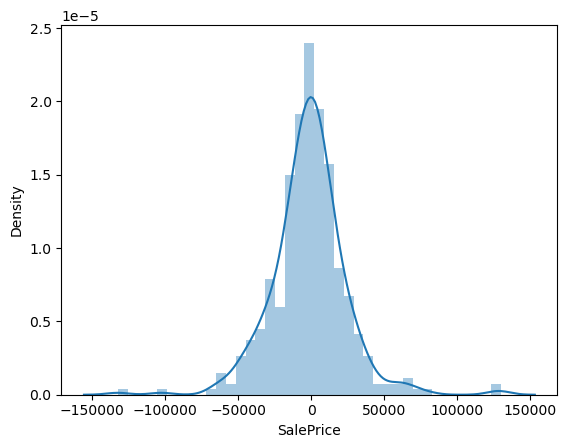

In [49]:
predict(sg_l)

In [46]:
sg_l.best_params_

{'alpha': 10, 'selection': 'cyclic'}

## Polynomial Features-Ridge

In [52]:
from sklearn.pipeline import make_pipeline


# Create a pipeline with Polynomial Features and Ridge regression
pipeline = make_pipeline(StandardScaler(),PolynomialFeatures(), Lasso(alpha=10,selection='cyclic'))

# Define the parameter grid for GridSearchCV
param_grid = {
    'polynomialfeatures__degree': range(1,6),
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the GridSearchCV on the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test)

In [53]:
# Evaluate the performance of the best model
#mse_ = mse(y_test, y_pred)
#rmse = np.sqrt(mse_)
print("Best hyperparameters:", best_params)
#print("RMSE:", rmse)

Best hyperparameters: {'polynomialfeatures__degree': 1}


In [54]:
r2_score(y_test, y_pred)

0.8710861136407259

## Polynomial Features-Linear Regression

In [83]:

# Create a pipeline with Polynomial Features and Ridge regression
pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())

# Define the parameter grid for GridSearchCV
param_grid = {
    'polynomialfeatures__degree': range(1,6)
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the GridSearchCV on the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test)

# Evaluate the performance of the best model
print("Best hyperparameters:", best_params)
print("R2_score:",np.round(r2_score(y_test, y_pred),3) )

mse_ = mse(y_test, y_pred)
rmse = np.sqrt(mse_)
print("RMSE:",rmse)


Best hyperparameters: {'polynomialfeatures__degree': 1}
R2_score: 0.871


TypeError: 'numpy.float64' object is not callable

In [ ]:
model_score=pd.DataFrame()
model_score["Model"]=model_
model_score["Score"]=score
Top5Scors=model_score.sort_values(by="Score",ascending=False)
print("The best 5 models are:")
Top5Scors

### lets strandardize our data and see the results :

In [40]:
X=scaler.fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=123)

In [41]:
models=[gs_3cv,gs_lr,sg_rr,sg_hgbr]

Model is: GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0, 0.2, 0.5, 0.8, 1],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2']})
Training score: 0.9341674128377749
Predictions are: [122722.19878194 124012.54279446 236771.58751123 188293.73186742
  55452.84602743]


r2 score is: 0.8717412128173209
MAE:650113435.7446464
MSE:650113435.7446464
RMSE:25497.322128895154
Model is: GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'n_jobs': [None, 0, 1, 10, 100],
                         'positive': [True, False]})
Training score: 0.8747420732548989
Predictions are: [114916.5 106468.5 254820.5 194148.5  39140.5]


r2 score is: -9.290539526131538e+24
MAE:4.709154595896943e+34
MSE:4.709154595896943e+34
RMSE:

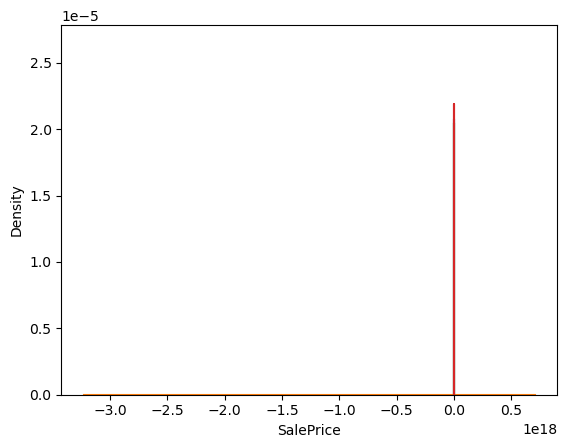

In [42]:
for mdl in models:
    predict(mdl)
    